<a href="https://colab.research.google.com/github/iaman29/Malaria_Prediction/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method used is Convolational Neural Network

> Indented block




In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset , dataset_info = tfds.load('malaria', with_info= True, as_supervised=True, shuffle_files= True, split=['train'])

In [ ]:
def splits( dataset , TRAIN_RATIO , VAL_RATIO , TEST_RATIO ):
  DATASET_SIZE = len( dataset )
  train_dataset = dataset.take( int ( TRAIN_RATIO * DATASET_SIZE ))
  # print( list ( train_dataset.as_numpy_iterator() ) )

  val_dataset = dataset.skip(int( TRAIN_RATIO * DATASET_SIZE ))
  val_dataset = val_dataset.take(int(   VAL_RATIO * DATASET_SIZE ))
  # print( list ( val_dataset.as_numpy_iterator() ) )

  test_dataset = dataset.skip(int((TRAIN_RATIO + VAL_RATIO)*DATASET_SIZE))
  # print( list ( test_dataset.as_numpy_iterator() ) )
  return train_dataset, val_dataset, test_dataset

In [ ]:
TRAIN_RATIO= 0.8
VAL_RATIO=0.1
TEST_RATIO=0.1
# dataset= tf.data.Dataset.range(10)
# print( list ( dataset.as_numpy_iterator()))

train_dataset, val_dataset, test_dataset = splits(dataset[0] , TRAIN_RATIO , VAL_RATIO , TEST_RATIO )

print(list(train_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()) )

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

# **DATA VISUALISATION**

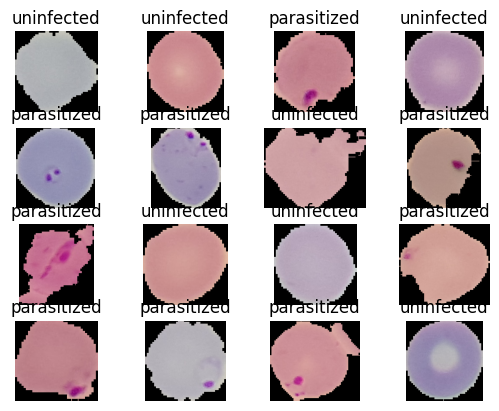

In [ ]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot( 4, 4 , i + 1 )
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
dataset_info.features['label'].int2str(0)

'parasitized'

In [ ]:
dataset_info.features['label'].int2str(1)

'uninfected'

# **DATA PROCESSING**

We are using method of normalisation, where as in car prediction dataset we use method of standardisation

In [ ]:
IM_SIZE=224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE ,IM_SIZE))/255.0,label

In [ ]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)


In [ ]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
BATCH_SIZE=32
train_dataset = train_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset = val_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
lenet_model = tf.keras.Sequential([
            InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),
            Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
            BatchNormalization(),
            MaxPool2D(pool_size=2,strides =2),

            Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
            BatchNormalization(),
            MaxPool2D(pool_size=2,strides =2),

            Flatten(),
            Dense(100,activation="relu"),
            BatchNormalization(),
            Dense(10,activation="relu"),
            BatchNormalization(),
            Dense(1,activation="sigmoid"),
])

In [ ]:
lenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [ ]:
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,1]
bce= tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9340706>

In [ ]:
lenet_model.compile(optimizer= Adam(learning_rate = 0.01) ,loss=BinaryCrossentropy(),metrics='accuracy')

In [ ]:
history = lenet_model.fit(train_dataset,validation_data=val_dataset,epochs=20,verbose=1)

Epoch 1/20
689/689 [==============================] - 93s 117ms/step - loss: 0.3742 - accuracy: 0.8324 - val_loss: 0.4220 - val_accuracy: 0.8784
Epoch 2/20
689/689 [==============================] - 70s 102ms/step - loss: 0.2149 - accuracy: 0.9262 - val_loss: 0.2997 - val_accuracy: 0.8846
Epoch 3/20
689/689 [==============================] - 59s 85ms/step - loss: 0.1863 - accuracy: 0.9405 - val_loss: 0.1809 - val_accuracy: 0.9401
Epoch 4/20
689/689 [==============================] - 57s 83ms/step - loss: 0.1907 - accuracy: 0.9353 - val_loss: 0.3324 - val_accuracy: 0.9234
Epoch 5/20
689/689 [==============================] - 54s 79ms/step - loss: 0.1639 - accuracy: 0.9467 - val_loss: 0.1535 - val_accuracy: 0.9514
Epoch 6/20
689/689 [==============================] - 61s 88ms/step - loss: 0.1599 - accuracy: 0.9466 - val_loss: 0.1374 - val_accuracy: 0.9532
Epoch 7/20
689/689 [==============================] - 58s 83ms/step - loss: 0.1731 - accuracy: 0.9438 - val_loss: 0.1687 - val_accurac

In [ ]:
import matplotlib.pyplot as plt


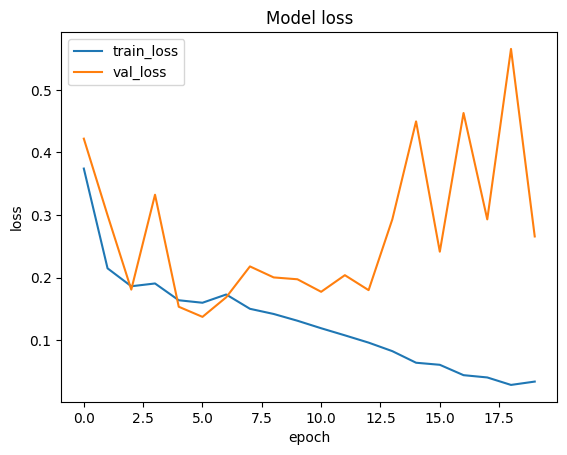

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

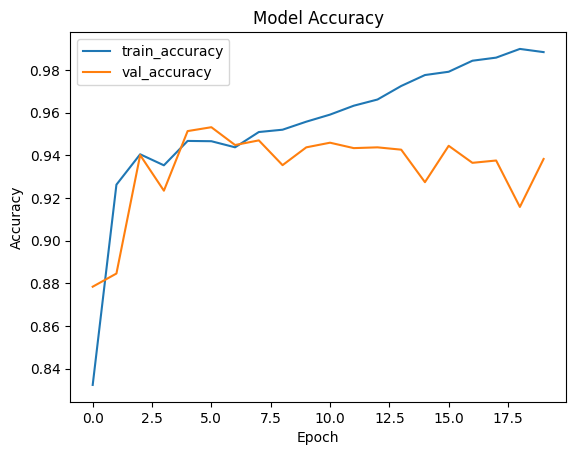

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

# **Model Evaluation and testing**

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
lenet_model.evaluate(test_dataset)

2756/2756 [==============================] - 27s 5ms/step - loss: 0.2988 - accuracy: 0.9314


[0.29876720905303955, 0.9314223527908325]

In [ ]:
def paraste_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

In [ ]:
paraste_or_not(lenet_model.predict(test_dataset.take(5))[0][0])


5/5 [==============================] - 13s 5ms/step


'P'

1/1 [==============================] - 0s 22ms/step


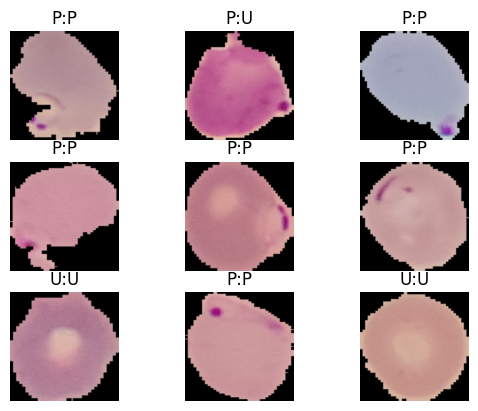

In [ ]:
for i, (image,label) in enumerate(test_dataset.take(9)):

  ax= plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(paraste_or_not(label.numpy()[0]))+":" + str(paraste_or_not(lenet_model.predict(image)[0][0])))
  plt.axis('off')